In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv('HR_comma_sep.csv')
data
#reading data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [3]:
data.shape
#checking features and rows

(14999, 10)

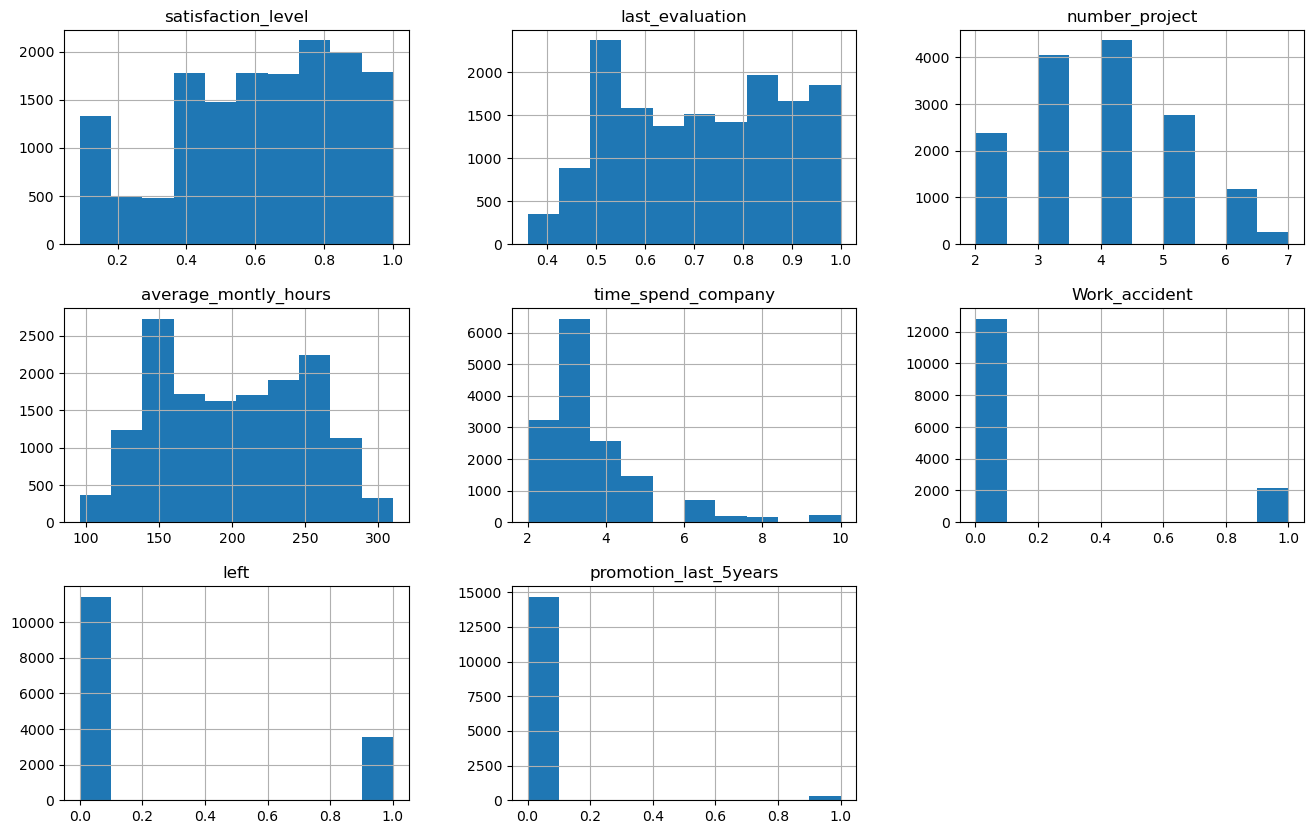

In [28]:
data.hist(figsize=((16,10)));

In [4]:
data.info()
#checking columns and datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


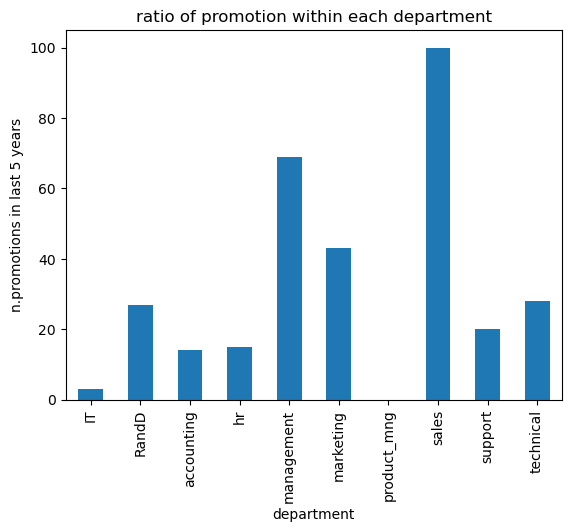

In [5]:
p5=data.groupby('Department')['promotion_last_5years'].sum().plot(kind='bar')
plt.xlabel('department')
plt.ylabel('n.promotions in last 5 years')
plt.title('ratio of promotion within each department')
plt.show()
#graphing relations to identify the effictive features
#comparing promotions withen departments

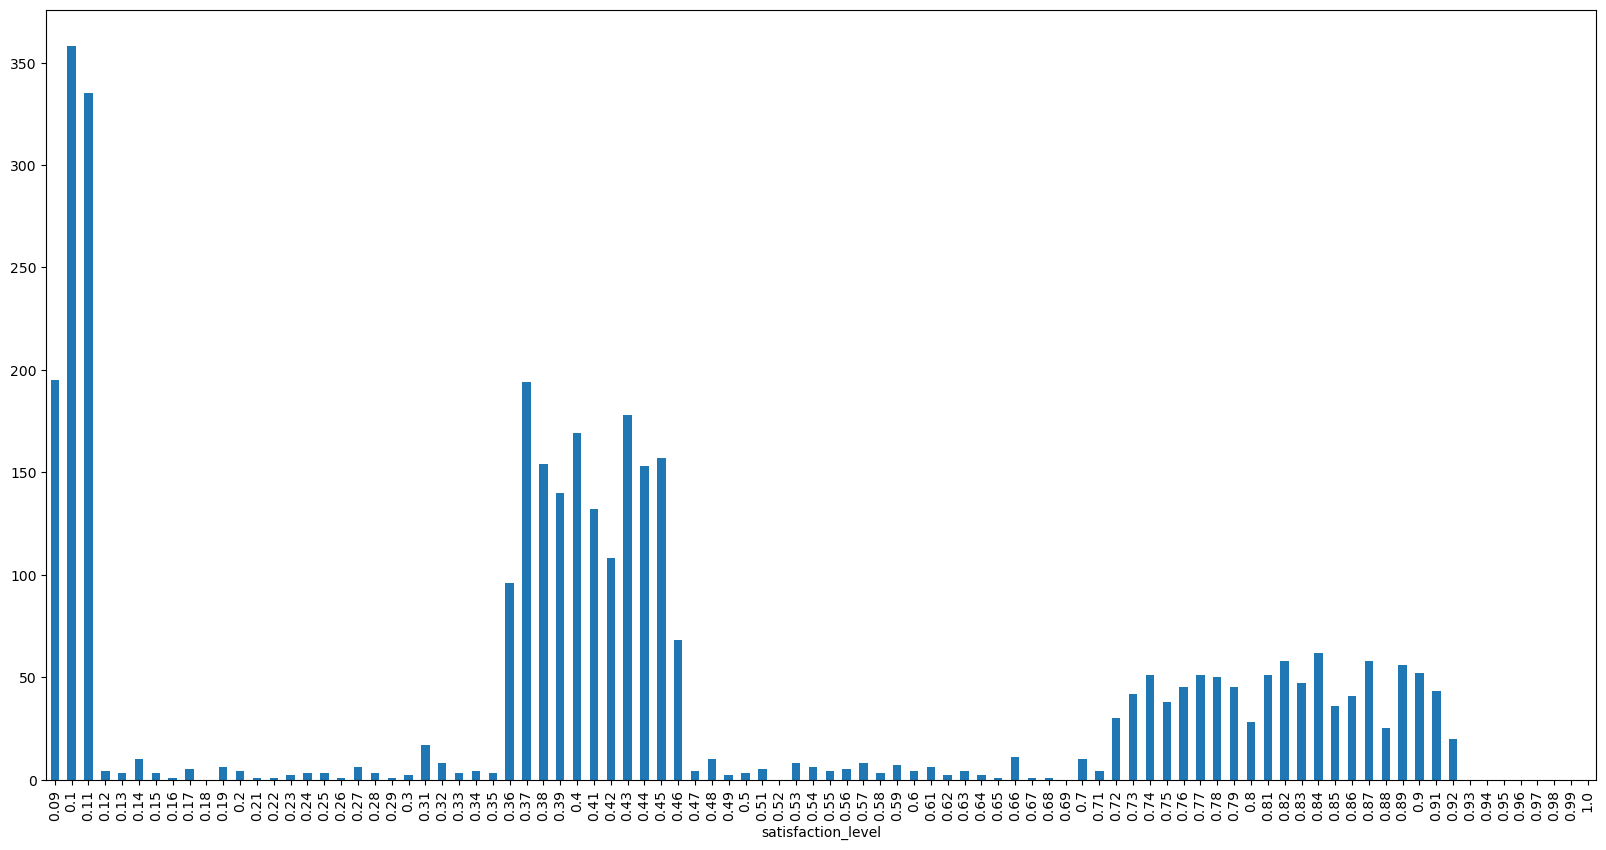

In [6]:
plt.figure(figsize=(20,10))
data.groupby('satisfaction_level')['left'].sum().plot(kind='bar')
plt.show()
#comparing the satisfaction of people how left

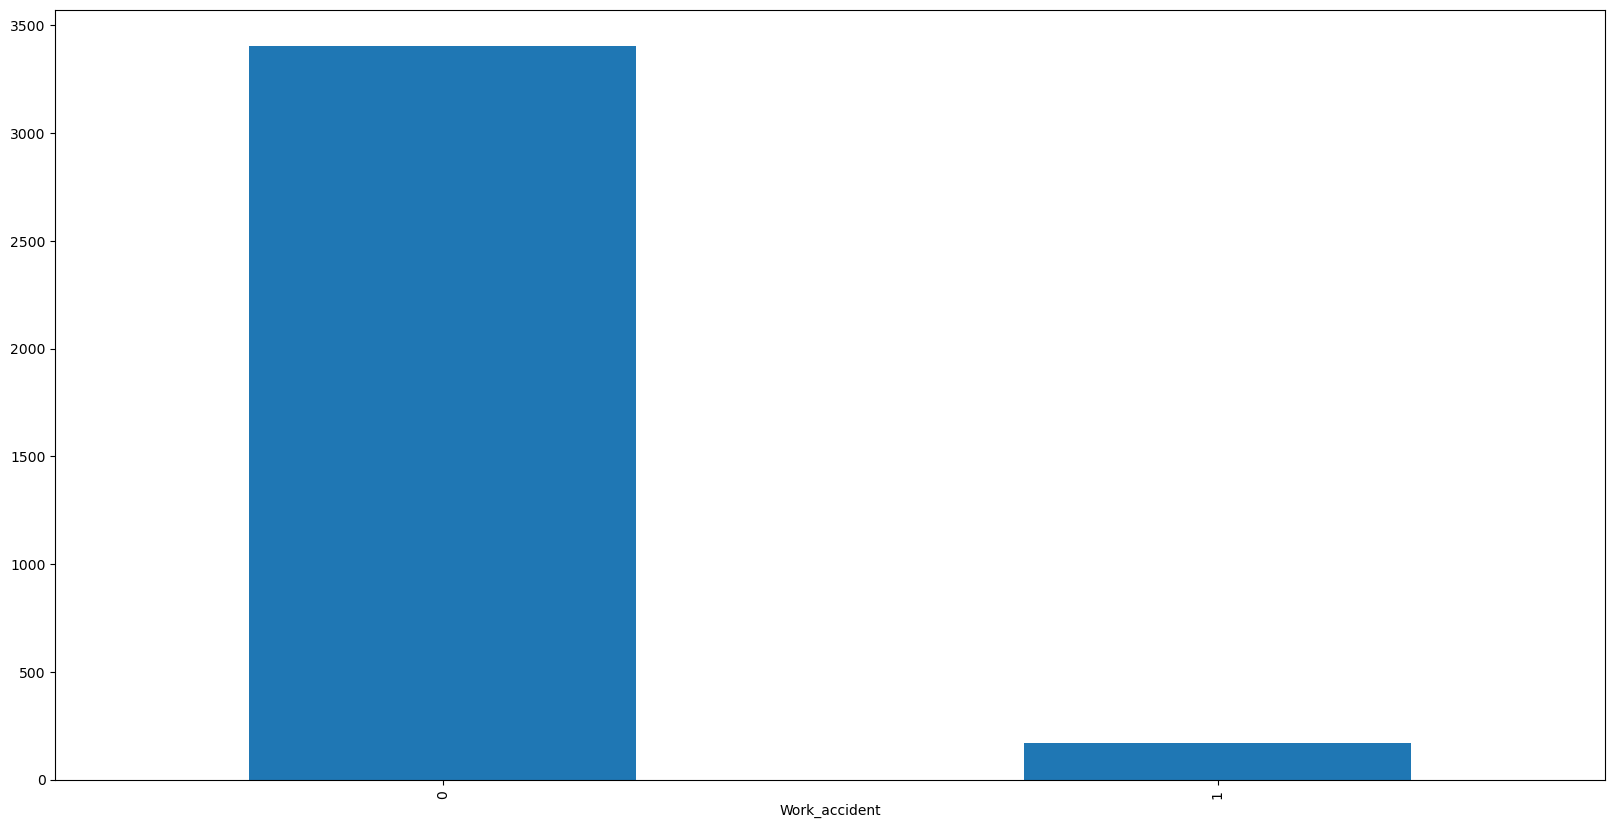

In [7]:
plt.figure(figsize=(20,10))
data.groupby('Work_accident')['left'].sum().plot(kind='bar')
plt.show()
#not a valid feature as many empolees who didnot left cause many accidents

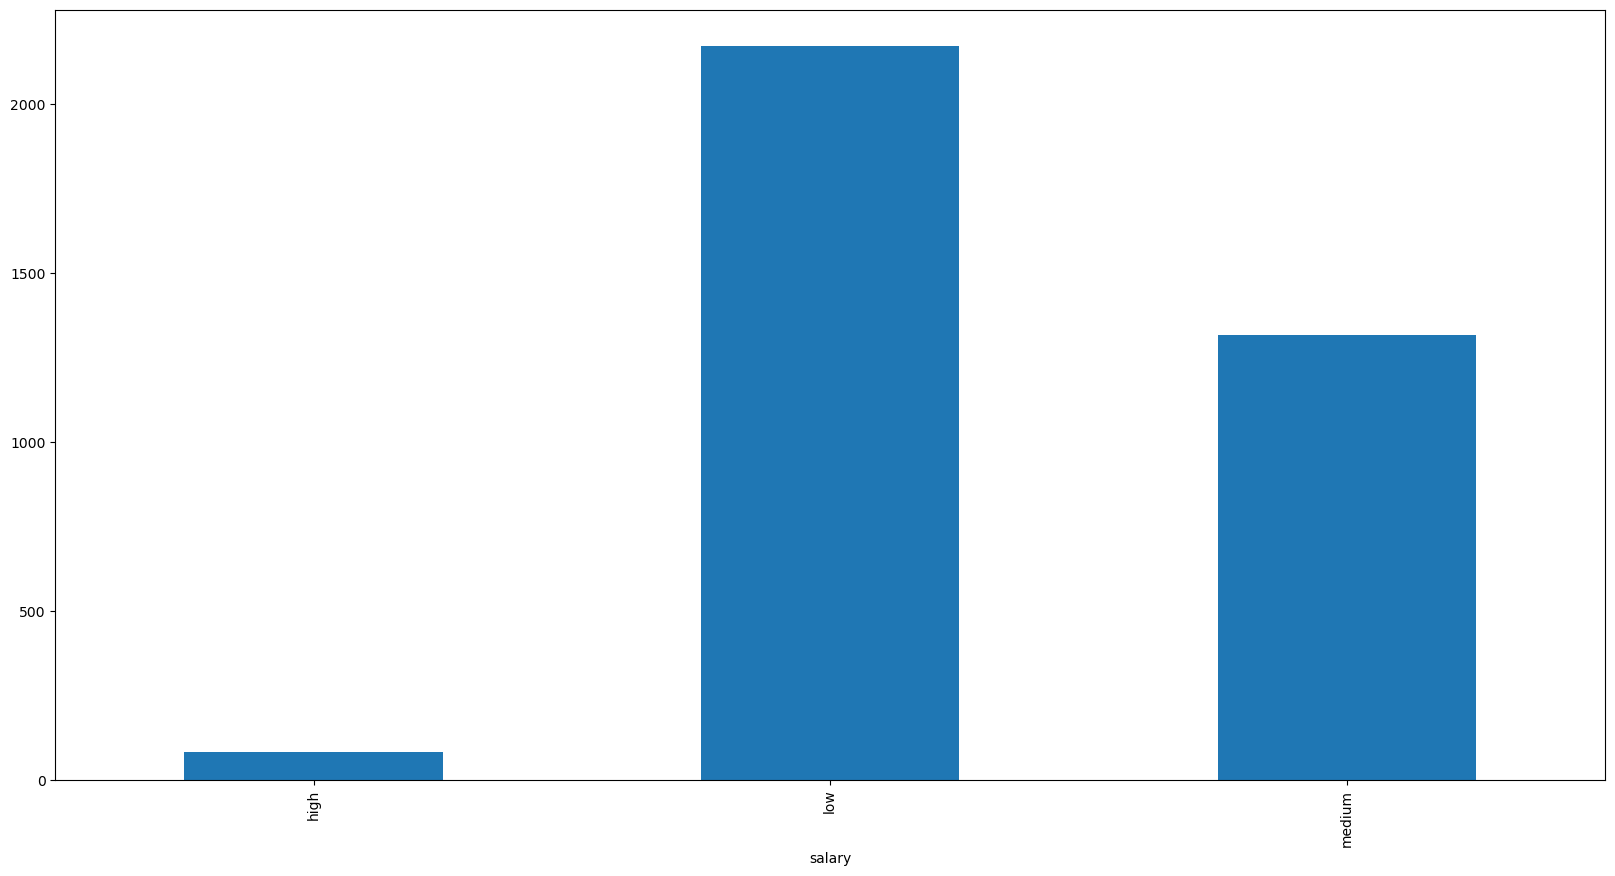

In [8]:
plt.figure(figsize=(20,10))
data.groupby('salary')['left'].sum().plot(kind='bar')
plt.show()
##big feature

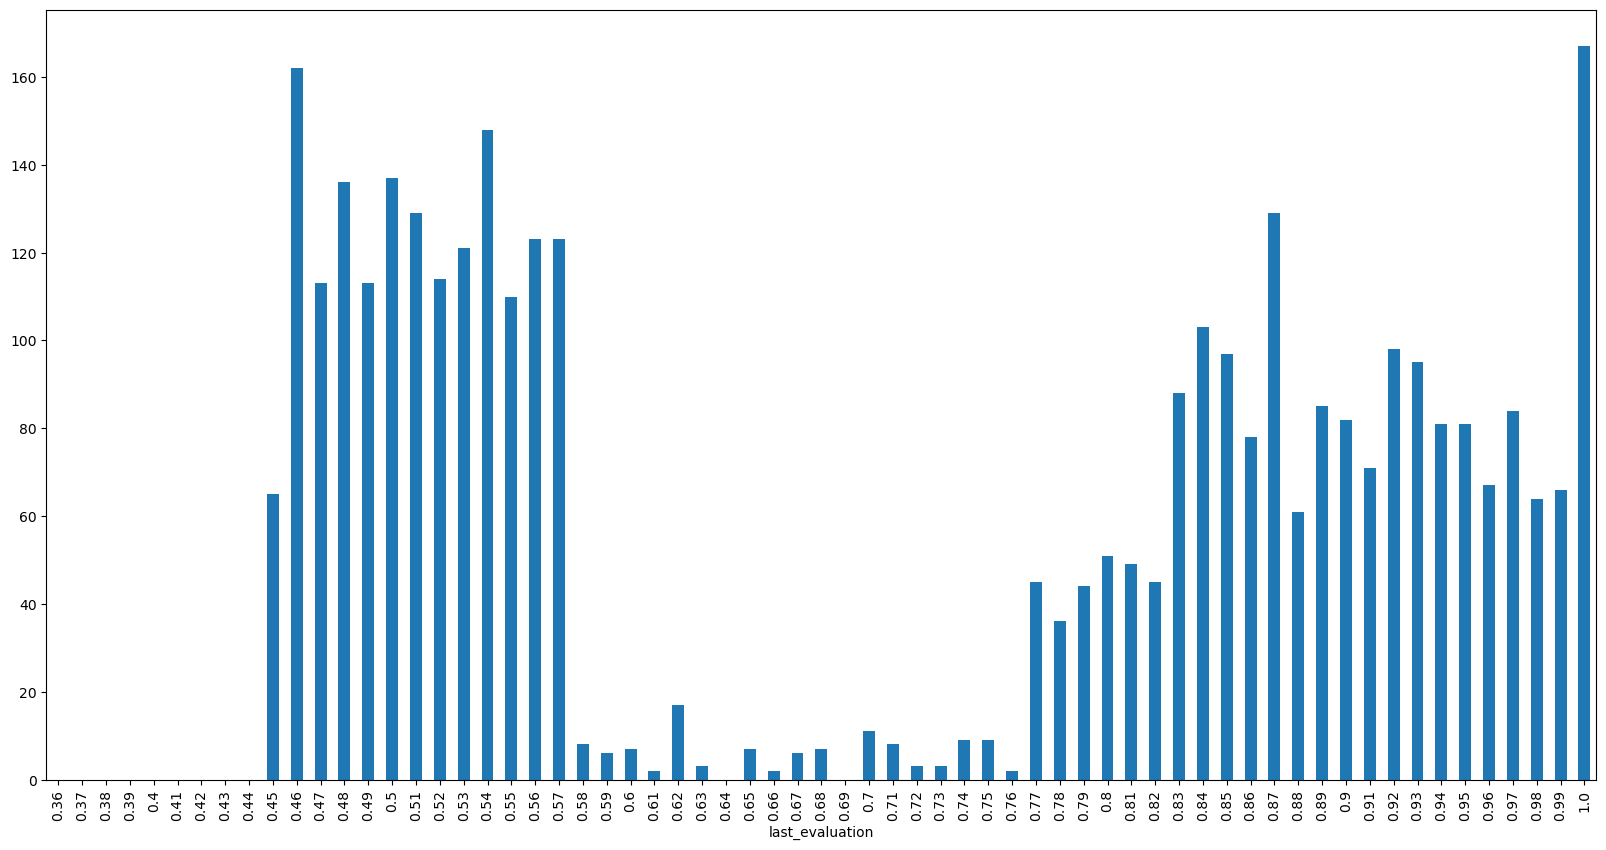

In [9]:
plt.figure(figsize=(20,10))
data.groupby('last_evaluation')['left'].sum().plot(kind='bar')
plt.show()


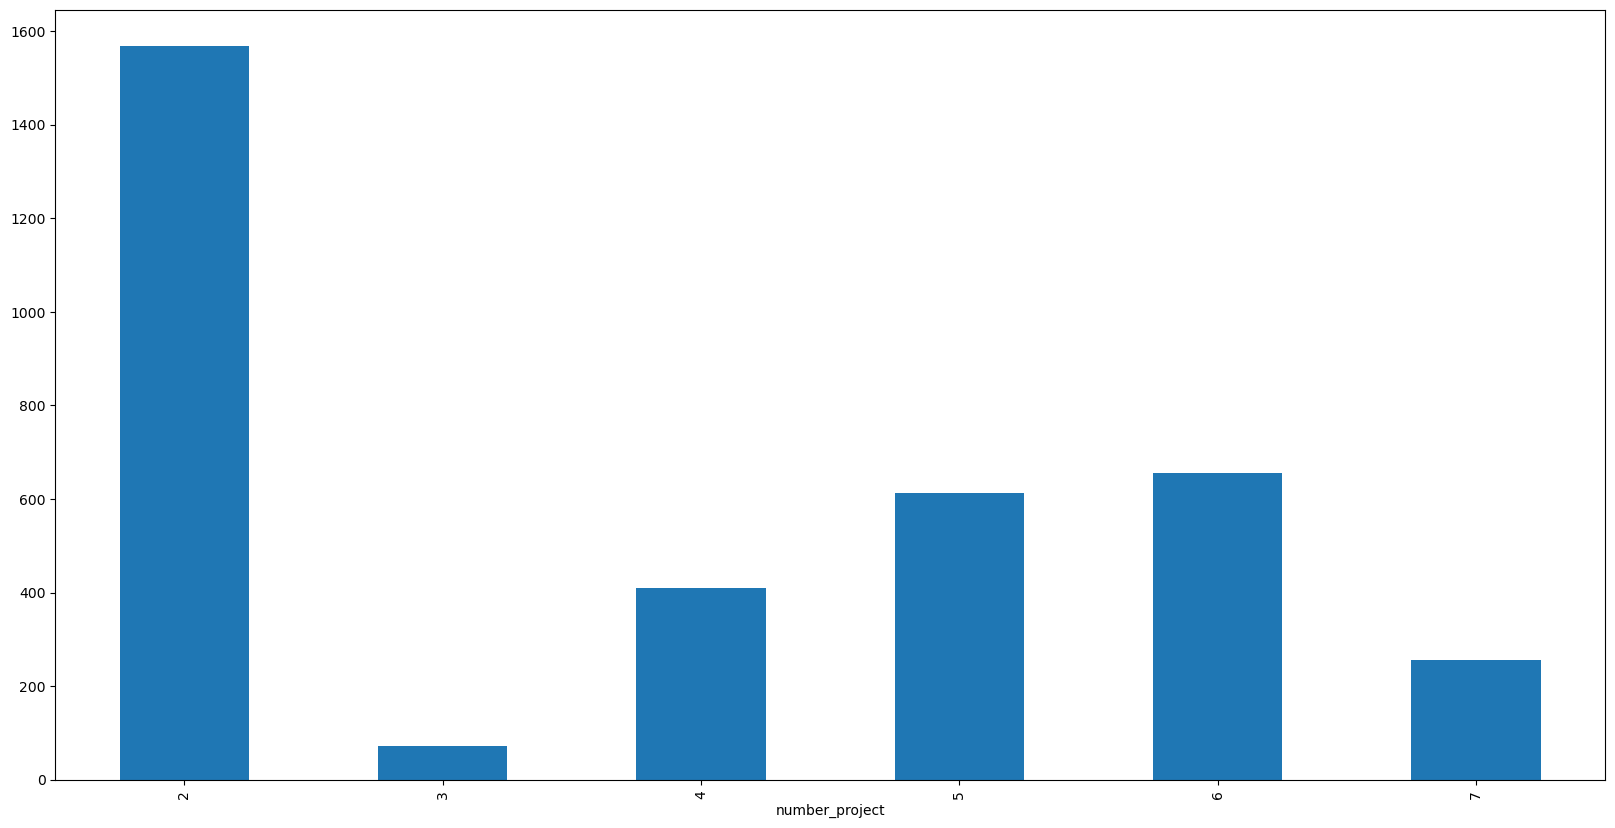

In [10]:
plt.figure(figsize=(20,10))
data.groupby('number_project')['left'].sum().plot(kind='bar')
plt.show()
#most of people how left done 2 or less projects

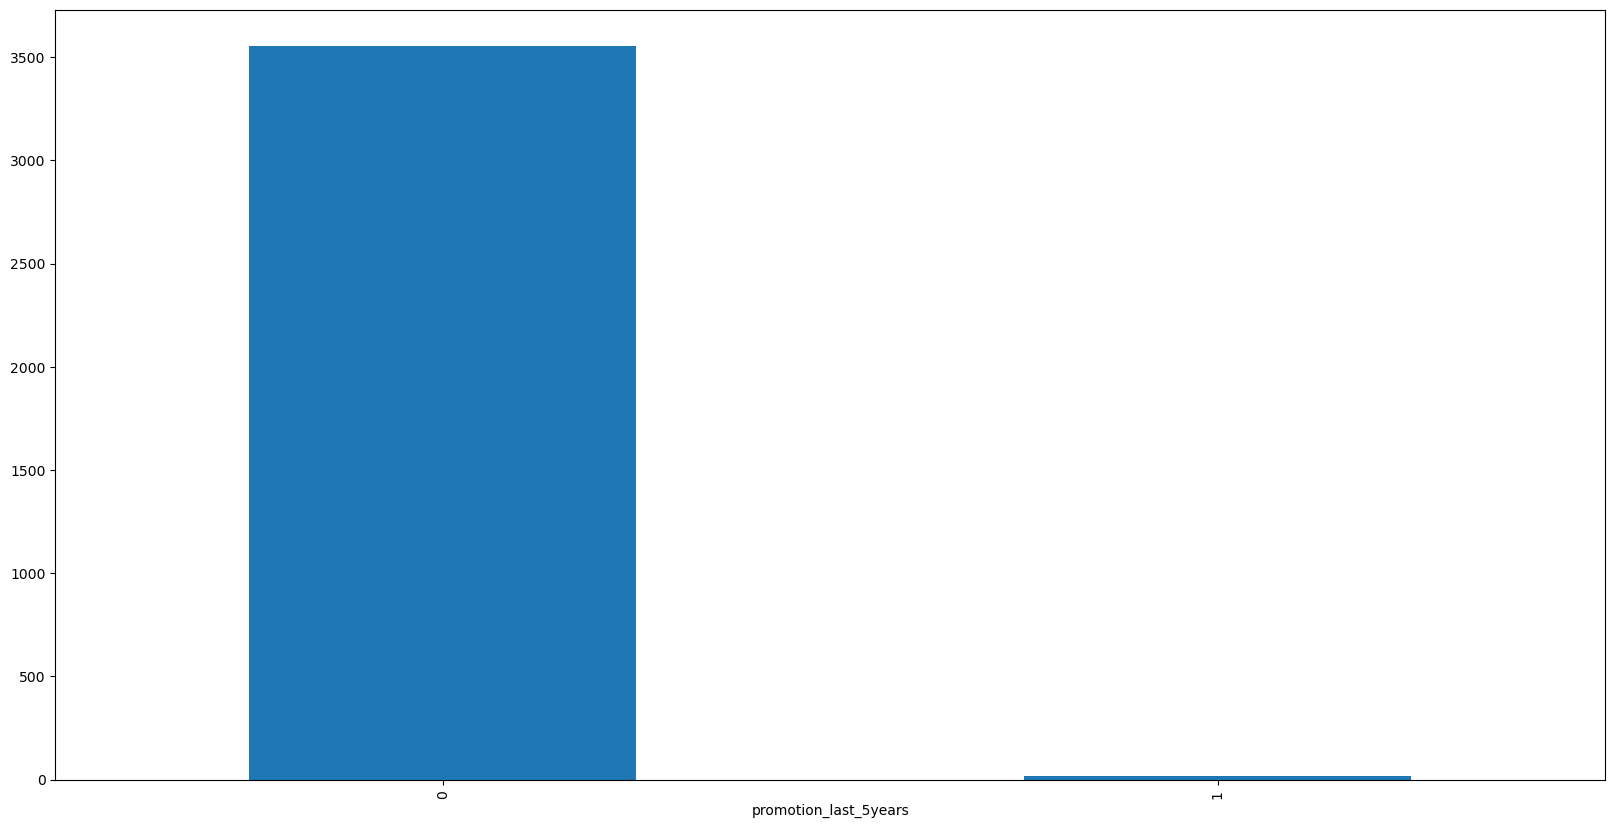

In [11]:
plt.figure(figsize=(20,10))
data.groupby('promotion_last_5years')['left'].sum().plot(kind='bar')
plt.show()
##big feature

In [12]:
new=data.drop(['Work_accident'],axis=1)
#removing outlier feature

In [13]:
new.duplicated().sum()
#checking duplicated data

3008

In [14]:
new.drop_duplicates(inplace=True)
#cleaning duplicated data

In [15]:
new.shape

(11991, 9)

In [19]:
df=pd.get_dummies(new)
y=df.left
x=df.drop(['left'],axis=1)
classification=DecisionTreeClassifier()
#setting the ML module

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [21]:
classification.fit(x_train,y_train)

DecisionTreeClassifier()

In [22]:
classification.score(x_train,y_train)
#testing the accuracy of trained data

1.0

In [23]:
classification.score(x_test,y_test)
#testing a stored data for testing to check accuracy

0.9620675281367236


<h1>To predict new data</h1><br>
To run the module with new data try :<br>
classification.predict([the values of the columns ])
